<a href="https://colab.research.google.com/github/Matinsalami/DataScience/blob/main/Hands_on_Machine_Learning/chapter_4/Training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## The Normal equation

Normal equation is a closed form solution for minimizing the cost function(MSE).  

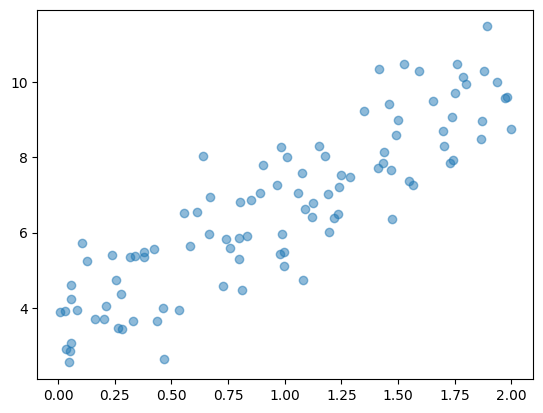

In [ ]:
#Generate some linear_looking code
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y,alpha=0.5)

In [ ]:
#Now we will compute the expected parameters with Normal Equation
#First we should set x0 = 1 for all instances. The reason is that we should include the intercept of equation

X_b = np.c_[np.ones((100,1)), X] # column concatination
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best # We supposed to compute 4 for intercept and 3 for the coeeficient, but with the Gaussian noise that we have, the predictions is not completely correct

array([[3.5331885 ],
       [3.20160111]])

In [ ]:
#Now let's make some predicitons with theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.5331885 ],
       [9.93639073]])

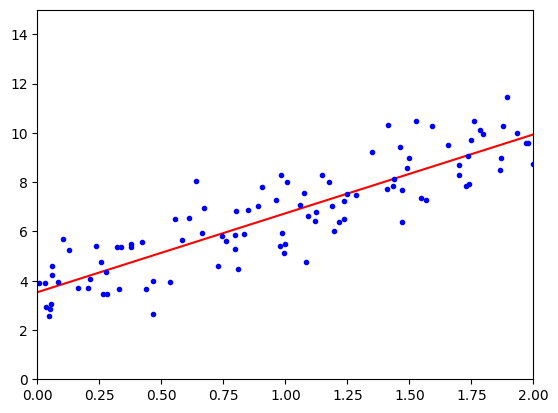

In [ ]:
# We can plot this model's predictions:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
# There is aregression model in Scikit-learn which uses Normal Equation

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)  # Fit the data
lin_reg.intercept_, lin_reg.coef_   # Display the y-intercept and coefficient

(array([3.5331885]), array([[3.20160111]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.5331885 ],
       [9.93639073]])

# Gradient Descent

## Batch Gradient Descent

In [ ]:
# We use gradient descent as an optimization algorithm to find the optimal solutions to minimize cost functions(Here MSE)
eta = 0.1  # learning rate(too small = slow learning| too big = unstable updates)
n_iterations = 1000 # we will apply gradient descent 1000 times on the data
m =100 # number of training examples
theta = np.random.randn(2,1) # random initialization of the parameters

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # this is the formula for gradient descent on the parameters given
  theta = theta - eta * gradients  # we update the new values for the parameters

# To find a good learning rate we can use GridSearch
# We must set the n_iterations a large number and set a threshold for the norm of gradient vector

# Now let's check the values for theta
theta

array([[3.5331885 ],
       [3.20160111]])

## Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent uses only 1 instance at a time to compute the gradients. This speeds up the training

n_epochs = 50 # Number of iterations we apply gradient descent

t0, t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)          # randomly pick an instance in the dataset
    xi = X_b[random_index:random_index+1]        # it's vector of dependent variables
    yi = y[random_index:random_index+1]          # the true value for the instance
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # compute the gradient descent algorithm on the instance
    eta = learning_schedule(epoch * m + i)       # slowly decaying the learning rate
    theta = theta - eta * gradients              # update the parameters

theta

array([[3.51700497],
       [3.24785861]])

In [ ]:
# Now we use the Stochastic Gradient descent in scikit-learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)  # Training will stop early if the improvement in the loss function is smaller than tol,
sgd_reg.fit(X,y.ravel()) # SGDRegressor expects a 1D array for the target y. So I convert y which is a 2D array into a 1D array

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_

array([3.53089684])

In [ ]:
sgd_reg.coef_

array([3.21273403])

# Polynomial Regression

In [ ]:
# Let's generate some nonlinear data, based on a simple quadratic equation
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

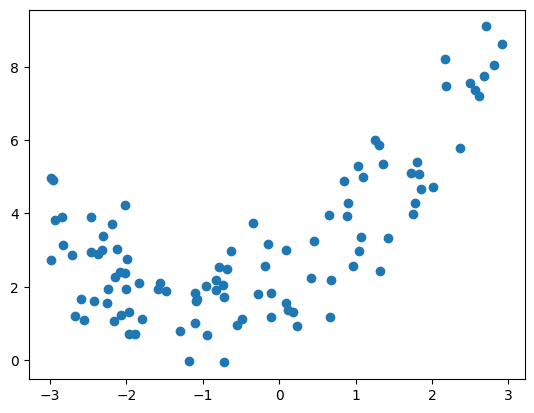

In [ ]:
plt.scatter(X,y)
plt.show()
# As can be seen a straight line would never fit to this data

In [ ]:
# We use a Scikit-learn class to transform our training data, adding the square of each feature in the training set as ne features
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly_feature.fit_transform(X)
X[0]

array([-2.1657744])

In [ ]:
X_poly[0]

array([ -2.1657744 ,   4.69057875, -10.15873539])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11544824]), array([[ 1.07255938,  0.45992394, -0.02444816]]))

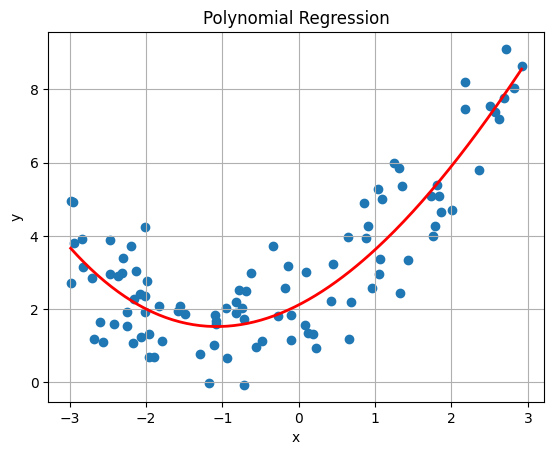

In [ ]:
X_new = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_new_poly = poly_feature.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.scatter(X, y)                                                # Original points
plt.plot(X_new, y_new, color='red', linewidth=2)                 # Regression curve
plt.title("Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Learning curves

If a model performes well on the training data but generalizes poorly according to the cross-validation metrics, then the model is overfitting. If it performs poorly on both, the model is underfitting

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [] , []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b--", linewidth=3, label="val")

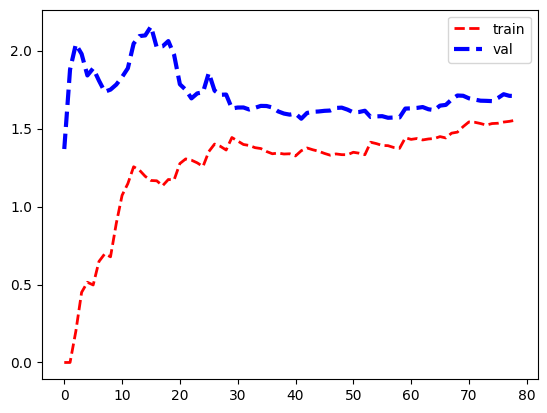

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)
plt.legend()

The plot indicates that we have low variance on the data as both curves plateaus, but both have fairly high error which shows underfitting the data by the model. Here we used a Linear Regression model which is why we get such high error. We should use more complex models like Polynomial regression which can fit the data better.

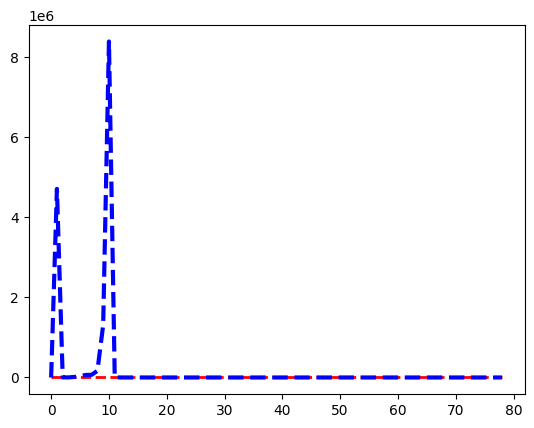

In [ ]:
# Here I use a 10th degree polynomial model on the same data

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

PolynomialRegression = Pipeline([
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(PolynomialRegression,X,y)

# Regularized Linear models

A good way to reduce overfitting the data is to regularize the model: Fewer degrees of freedom.

For a polynomial regression model: reduce the number of polynomial degrees

For a linear model, regularization is typically achieved by constraining the weights of the model. We look at Ridge regression, Lasso regression, Elastic Net.

## Ridge Regression

Ridge Regression is a type of linear regression that includes L2 regularization to prevent overfitting.

It's especially useful when:

1. You have many features

2. Your data is noisy

3. Features are correlated (multicollinearity)

REMARK: As linear regression, we can have Ridge Regression both in a closed form and using stochastic gradient descent.


In [ ]:
#Generate some linear_looking code
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
# closed-form
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([8.66657546])

In [ ]:
# stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.77961089])

## Lasso Regression

If instead of l2 norm e add l1 norm to the cost function.
On of the features of Lasso regression is that it tends to completely eliminate the weights of the least important features by setting them to 0.

In [ ]:
# closed-form
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.58262205])

In [ ]:
# stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.78073783])

## Elastic Net

Elastic Net is a middle between Ridge and Lasso Regression. We have a regularization term called "r" that control how much of each term is causing regularization in the final cost function which is the sum of all terms including MSE.

An important note is that when should we use each model. We have plain, Ridge, Lasso, ElasticNet Regression models.
Ridge is usually a good default model.
If we suspect that some features are useless we can use ElasticNet or Lasso model. However again ElasticNet is more preferable as Lasso can act act erratically when the number of features are high or some features are correlated.

In [ ]:
# ElasticNet with Scikit-learn
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ration is the "r" term
elasticNet.fit(X,y)
elasticNet.predict([[1.5]])

array([8.49031754])

## Early stopping

 In models with iterative learning algorithms such as Gradient descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. As the epochs go by, the algorithm learns and prediction error (RMSE) on the training set naturally goes down, and so does its predition error on the validation set. However, after a while the validation error starts to go up again after a while. This shows we are in danger of overfitting. So we should stop the training process as soon as the validation error reaches the minimum.  

In [ ]:
import copy

# Let's generate some nonlinear data, based on a simple quadratic equation
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
y_train = y_train.ravel()
y_val = y_val.ravel()

from sklearn.base import clone

poly_scalar = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),("std_scalar", StandardScaler())])

X_train_poly_scalded = poly_scalar.fit_transform(X_train)
X_val_poly_scaled = poly_scalar.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scalded, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = copy.deepcopy(sgd_reg)


In [ ]:
best_epoch

697

In [ ]:
from sklearn.metrics import mean_squared_error

final_preds = best_model.predict(X_val_poly_scaled)
final_mse = mean_squared_error(y_val, final_preds)
print(f"✅ Best Validation MSE: {final_mse:.4f}")


✅ Best Validation MSE: 0.8842


# Logistic Regression

This algorithm is a regression model used for classification. It is used to commonly estimate the probability that an instance belongs to a specific class. If the estimated probability is above 50% then the instance belongs to class 1. Else it belongs to class 0. This is a **binary** classifier.  

## Estimating Probabilities



So let us see what happens in this algorithm. Like all regression models. We have an equation which computes a weighted sum of all the features with their coefficients. But now the result which we call **z** is not returned; instead, we apply a **sigmoid** function and that in return gives us a number between 0 and 1.The sigmoid function:

$\hat{p} = \sigma(z) = \frac{1}{1 + e^{-z}}$

Now we decide. If $\hat{p}$ is above 0.5 then it belongs to class 1 otherwise it belongs to class 0.

## Training and cost function

Now how do we find the best weights $Θ$ that minimizes the error between predicted results and actual results. We do this by minimizing a special loss function called **Log loss** or **Binary Cross-Entropy**:

$Loss =-[y\log(\hat{p}) + (1 + y)log(1 - \hat{p})]$

Now we can find the Cost function, based on the Loss function that we have:

$J(Θ) = \frac{1}{m}∑_{i=1}^{m}[y\log(\hat{p}) + (1 + y)log(1 - \hat{p})]$

What is important to note is that we do not have a closed-form equation to compute the minimized values of $Θ$.

Also the cost function is convex so Gradient Descent is guaranteed to find the global minimum.


## Decision Boundaries

We use Iris Dataset for Logistic Regression illustration.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [23]:
X = iris["data"][:,3:] # petal-width
y = (iris["target"] == 2).astype(int) # if Iris-Virginica, else 0

In [24]:
#Train a Logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [25]:
# Let's look at the model's extimated probabilities for flowers with petal width varying from 0 to 3 cm.
X_new = np.linspace(0,3,1000).reshape(-1,1) # The reshape part make input values into a column vector
y_proba = log_reg.predict_proba(X_new)

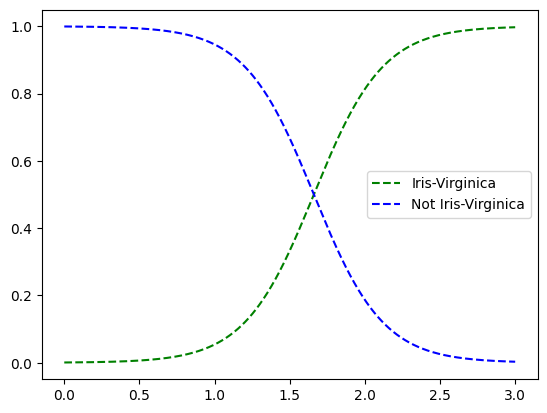

In [26]:
plt.plot(X_new, y_proba[:,1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()

Just like any other linear model, Logistic Regression models can be regularized using l1 and l2 penalties. Scikit-learn actually adds an l2 penalty by default. Also the regularization hyperparameter is not alpha anymore but is inverse: C. The higher C the higher the model is regularized.

## Softmax Regression

If we generalize Logistic Regression to have a multiclass classifier instead of a binary one, we call it **Multinomial Logistic Regression** or ** Softmax Regression**. We have a Softmax function:

$P(y = k \mid \mathbf{x}) = \frac{e^{\boldsymbol{\theta}_k^\top \mathbf{x}}}{\sum_{j=1}^{K} e^{\boldsymbol{\theta}_j^\top \mathbf{x}}}
$

What it does is simple. It just get the logits from the linear model. put it in the equation above. and compute three probabilities. The highest probability is the class that the instance belongs to.

**Note** : Softmax regression in multiclass, not multioutput. So it should be used only with mutually exclusive classes like different species of flowers not multiple people in a room.

For The training part, we want a model to estimate high probability for the right target class. So our goal is to minimize the cost function

$\mathcal{J} = -\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log \hat{p}_k^{(i)}
$

which is called **Cross entropy cost function**.

Then we have Cross entropy gradient vector for class k to compute the gradient and compute the updated values for $Θ$.

$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{p}^{(i)}_k - y^{(i)}_k \right) x^{(i)}
$

Let's implement Softmax regression with Scikit Learn

In [28]:
X = iris["data"][:, (2,3)] # petal-length, petal-width
y = iris["target"]

In [29]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)
# multi_class="multinomial" means you want to use softmax regression
# solver="lbfgs" is used to determine the optimization algorithm used to tain the model
# C=10 is the regulariztion strngth. higher values of C shows weaker regularization(Danger of overfitting)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [30]:
#The predict method basically return the class with the highest probability.
#With predict_proba method we have the probability computed for each class.
softmax_reg.predict([[5,2]])

array([2])

In [31]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])